# matplotlib

<u>**data可視化グラフライブラリ**</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Graph ( scatter, plot, bar )

In [2]:
df = pd.read_excel('./resources/Concentration.xlsx', index_col=0)

df.head()

,C[mol/L]
time[s],
0,1.000000
1,0.904837
2,0.818731
3,0.740818
4,0.670320


Text(0, 0.5, 'C[mol/L]')

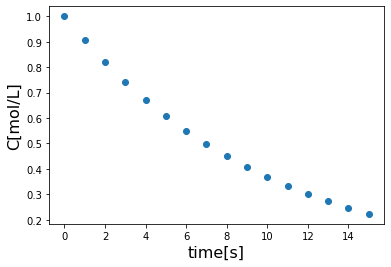

In [3]:
plt.scatter(df.index, df['C[mol/L]'])
plt.xlabel('time[s]', fontsize=16)
plt.ylabel('C[mol/L]', fontsize=16)

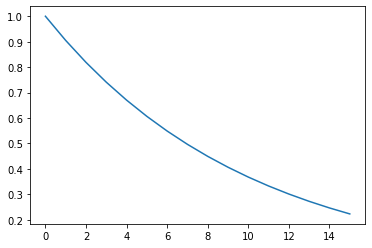

In [4]:
plt.plot(df.index, df['C[mol/L]'])

<BarContainer object of 16 artists>

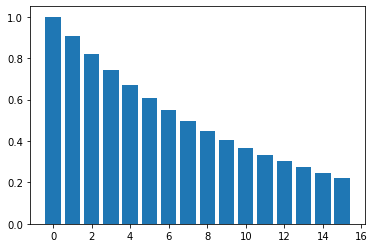

In [5]:
plt.bar(df.index, df['C[mol/L]'])

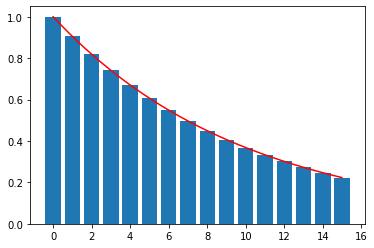

In [6]:
x = np.arange(0, 15, 0.01)
y = np.exp(-0.1*x)
plt.bar(df.index, df['C[mol/L]'])
plt.plot(x, y, color='r')

## Graph ( subplot )

In [7]:
x = np.arange(-10, 10, 0.01)
y = 1.0 / (1.0 + np.exp(-x))

In [8]:
x2 = np.arange(-6, 6, 0.01)
y2 = np.sin(x2)

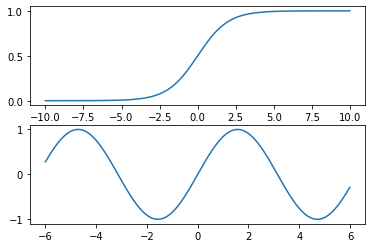

In [9]:
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.subplot(2, 1, 2)
plt.plot(x2, y2)

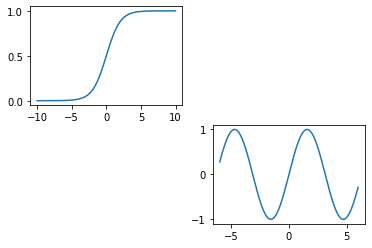

In [10]:
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.subplot(2, 2, 4)
plt.plot(x2, y2)

## 3次元　plot

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [31]:
# キムサム用
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
# キムサム : 累積和　：　
a.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

- **累積和**
    - *右側を足し合わせて次の解を算出する。それをどんどん左側にずらして行く*

In [33]:
# 正規分布のキムサム
x = np.random.randn(100).cumsum()
y = np.random.randn(100).cumsum()
z = np.random.randn(100).cumsum()

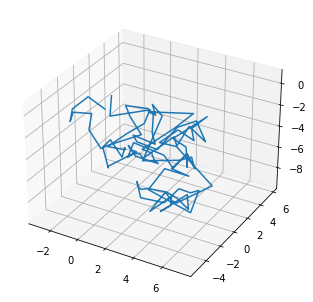

In [34]:
# 3Dには下記の手続きか必要
%matplotlib inline
fig = plt.figure()    # fig を描くような枠
ax = Axes3D(fig)      # 軸が　３Dに変更される
ax.plot(x, y, z)
plt.show()

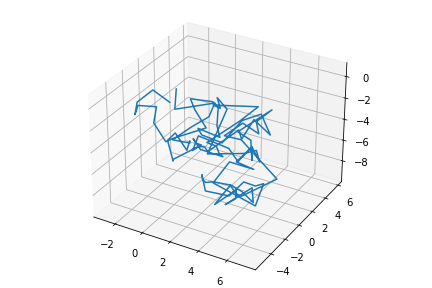

In [35]:
%matplotlib widget
fig = plt.figure()    # fig を描くような枠
ax = Axes3D(fig)      # 軸が　３Dに変更される
ax.plot(x, y, z)
plt.show()

### 
- **pip install ipympl**

- ipymplバックエンドを有効にするには、matplotlibJupyterマジックを使用する
    - **%matplotlib widget**

> https://github.com/matplotlib/ipympl

## Graph (intaractive)
- 時刻変化でグラフの変化を表示させる
    - **今回は粒子の時刻変化によっての変化を表示**

In [36]:
from ipywidgets import interact
%matplotlib widget

In [37]:
df_x = pd.read_csv('./resources/brownian_x.csv', delimiter=',', index_col=0)
df_y = pd.read_csv('./resources/brownian_y.csv', delimiter=',', index_col=0)

In [38]:
df_x.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.660897,0.308681,1.150186,0.080541,-0.012792,0.691837,0.070849,0.145932,-0.388698,0.650669,...,-0.227122,-0.898830,1.408201,-0.784713,0.855479,0.858106,-0.071653,-1.243743,0.518966,-1.193671
2,3.598515,0.108084,1.751230,-0.317608,-0.219819,1.516001,-0.956749,-0.325082,0.261582,-0.706170,...,-2.010389,1.388606,0.752354,-0.833061,2.135601,-0.372791,-0.086453,0.750444,1.616107,-1.558488
3,2.985630,-0.819268,0.730809,-2.676886,1.619011,-0.486863,-1.926352,0.229255,-0.156492,-0.030275,...,-2.112969,1.925312,-1.023566,0.906403,1.582525,-0.128784,0.065607,1.319800,2.979209,-0.167360
4,3.768073,-0.303198,0.678676,-3.187084,2.514568,-0.358183,-0.389710,0.800627,-2.380285,1.512981,...,-1.559767,2.913672,-1.371663,1.885403,0.066579,-0.859434,-1.679999,0.500541,3.771645,-1.126620


In [39]:
@interact(time=(0,500,10))  # 0 : start / 上限 : 500 / 10刻み
def animation(time=0):      # 初期値 : 0
    plt.xlim((-100,100))
    plt.ylim((-100,100))
    for i in range(df_x.shape[1]):
        plt.scatter(df_x.iloc[time, i], df_y.iloc[time, i])
    plt.show()

interactive(children=(IntSlider(value=0, description='time', max=500, step=10), Output()), _dom_classes=('widg…

In [40]:
from ipywidgets import interact
%matplotlib inline

In [41]:
@interact(time=(0,500,10))  # 0 : start / 上限 : 500 / 10刻み
def animation(time=0):      # 初期値 : 0
    plt.xlim((-100,100))
    plt.ylim((-100,100))
    for i in range(df_x.shape[1]):
        plt.scatter(df_x.iloc[time, i], df_y.iloc[time, i])
    plt.show()

interactive(children=(IntSlider(value=0, description='time', max=500, step=10), Output()), _dom_classes=('widg…

## グラフの設定
- **微生物の繁殖を予測と実際の繁殖数**
    - *exp と sim と Temp をグラフで描画*


- **exp (実験 ： experiment)**


- **sim ( シュミレーション :　simulation)**


- **Temp (温度　：　Temperature)**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df_e = pd.read_excel('./resources/data_for_graph.xlsx', sheet_name='exp', index_col=0)
df_s = pd.read_excel('./resources/data_for_graph.xlsx', sheet_name='sim', index_col=0)

In [44]:
df_e

,Number,Temp
Time[day],,
0,0,23.2
2,11,24.5
4,89,23.5
6,300,23.2
8,350,22.5
10,380,20.0
12,400,22.9
14,390,23.5


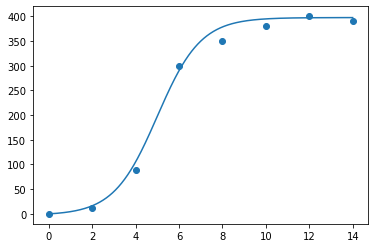

In [45]:
plt.scatter(df_e.index, df_e['Number'])
plt.plot(df_s.index, df_s['Number'])

In [46]:
# plt の　 style を指定することで好みのモノを指定できる (上下で確認)
plt.style.use('ggplot')

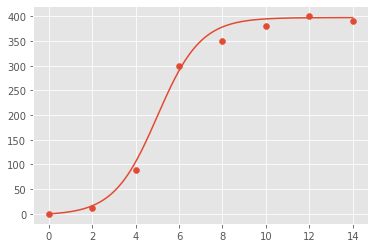

In [48]:
plt.scatter(df_e.index, df_e['Number'])
plt.plot(df_s.index, df_s['Number'])

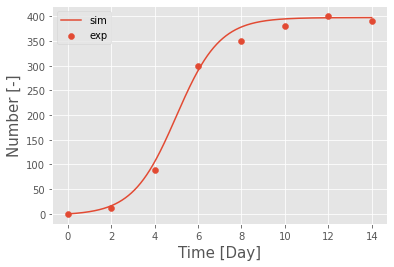

In [51]:
# x軸・y軸の設定 : exp (実験 ： experiment) sim ( シュミレーション :　simulation)
plt.scatter(df_e.index, df_e['Number'], label='exp')
plt.plot(df_s.index, df_s['Number'], label='sim')
plt.xlabel('Time [Day]', fontsize=15)
plt.ylabel('Number [-]', fontsize=15)
plt.legend()

- <u>上記がよく現場で使用されるレベル(報告会など)</u>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


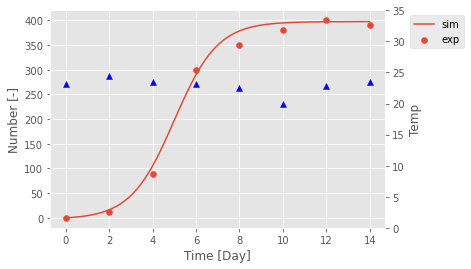

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)                                  # 1行 １列 index 1 を使用する
ax1.scatter(df_e.index, df_e['Number'], label='exp')
ax1.plot(df_s.index, df_s['Number'], label='sim')
ax1.set_xlabel('Time [Day]')
ax1.set_ylabel('Number [-]')
ax1.legend(bbox_to_anchor=(1.25,1.0))                            # legend : 判例の場所を変更
ax2 = ax1.twinx()                                                # 第二軸を設定する : Timeを共通として第二軸を設定する
ax2.set_ylim([0, 35])                                            # 温度の範囲をせてい　0 ~ 35度
ax2.grid(False)                                                  # grid　off
ax2.set_ylabel('Temp')                                           # Temp (温度　：　Temperature)
ax2.scatter(df_e.index, df_e['Temp'], color='b', marker='^')

# save(保存関係)
plt.tigeht_layout()                 # label, title がはみ出ないように調整してくれる
plt.savefig('./numpy pandas/test.eps', dpi=300)  # Graph を　save

- **微生物の繁殖を予測と実際の繁殖数**
    - *exp と sim と Temp をグラフで描画*


- **exp (実験 ： experiment)**


- **sim ( シュミレーション :　simulation)**


- **Temp (温度　：　Temperature)**